In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from datetime import datetime, timedelta
import requests
import json
from pprint import pprint as pp

from astropy.io import fits
import astropy.io.fits as pyfits
import astropy.utils as autils
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS



In [2]:
natroot='https://astroarchive.noirlab.edu'
baseurl=f'{natroot}/api/sia'
print(f'This notebook demonstrates services rooted at: {baseurl}')

url = f'{baseurl}/vohdu?FORMAT=METADATA&format=json'
print(f'URL of service = {url}')
pd.DataFrame(requests.get(url).json()[1:])

adsurl = f'{natroot}/api/adv_search'

all_cats = requests.get(f'{adsurl}/cat_lists/?format=json').json()

This notebook demonstrates services rooted at: https://astroarchive.noirlab.edu/api/sia
URL of service = https://astroarchive.noirlab.edu/api/sia/vohdu?FORMAT=METADATA&format=json


In [3]:
#try:
#    c = name_resolve.get_icrs_coordinates('NGC 2158')
#except:
#    print('name resolve failed')
#    coord_str="01 41 59.0 +32 03 52.8"
#    c=SkyCoord(coord_str,unit=(u.hourangle, u.deg))

#coord_str="01 41 59.0 +32 03 52.8"
#c=SkyCoord(coord_str,unit=(u.hourangle, u.deg))

#ra = c.ra.value # in degrees
#dec = c.dec.value # in degrees
#size = 5 # search radius in degrees


jj = {
    "outfields" : [
        "telescope",
        "md5sum",
        "ra_min",  # "ra" is a "range_field" in Postgres, access either part of range
        "archive_filename",
        "instrument",
        "proc_type",
        "ifilter",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "EXPTIME",
        "AIRMASS",
        "OBJECT",
        "SEQID"
    ],
    "search" : [
        ["instrument", "newfirm"],
        ["proc_type", "instcal"],
        ["exposure",0,10]
    ]
}

adsurl = f'{natroot}/api/adv_search'

print(f'Using API url: {adsurl}')

result_limit = 100000
sia_results = pd.DataFrame(requests.post(f'{adsurl}/find/?limit={result_limit}',json=jj).json()[1:])






Using API url: https://astroarchive.noirlab.edu/api/adv_search


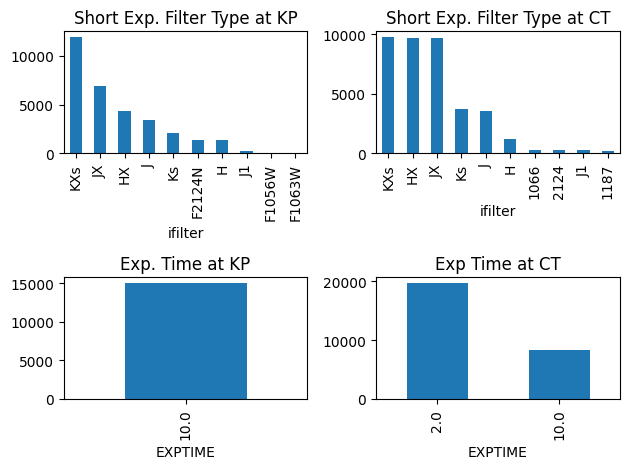

In [4]:
plt.figure()
plt.subplot(2,2,1)
sia_results[(sia_results['telescope'] == 'kp4m')]['ifilter'].value_counts()[:10].plot(kind='bar')
plt.title('Short Exp. Filter Type at KP')

plt.subplot(2,2,2)
sia_results[(sia_results['telescope'] == 'ct4m')]['ifilter'].value_counts()[:10].plot(kind='bar')
plt.title('Short Exp. Filter Type at CT')

plt.subplot(2,2,3)
sia_results[(sia_results['telescope'] == 'kp4m')]['EXPTIME'].value_counts().loc[:10].plot(kind='bar')
plt.title('Exp. Time at KP')

plt.subplot(2,2,4)
sia_results[(sia_results['telescope'] == 'ct4m')]['EXPTIME'].value_counts().loc[:10].plot(kind='bar')
plt.title('Exp Time at CT')
plt.gcf().tight_layout()


In [5]:
requests.get(f'{adsurl}/aux_file_fields/newfirm/instcal/').json()

[{'Field': '0', 'Type': 'str', 'Desc': ''},
 {'Field': 'AIRMASS',
  'Type': 'str',
  'Desc': 'airmass at approx. start of exposure'},
 {'Field': 'ALT', 'Type': 'str', 'Desc': ''},
 {'Field': 'ASTRMCAT', 'Type': 'str', 'Desc': ''},
 {'Field': 'AZ', 'Type': 'str', 'Desc': ''},
 {'Field': 'BIASSEC', 'Type': 'str', 'Desc': 'overscan portion of frame'},
 {'Field': 'BLKUID', 'Type': 'str', 'Desc': ''},
 {'Field': 'BLOCK_ID', 'Type': 'str', 'Desc': ''},
 {'Field': 'BUNIT', 'Type': 'str', 'Desc': ''},
 {'Field': 'CENTDEC', 'Type': 'str', 'Desc': ''},
 {'Field': 'CENTRA', 'Type': 'str', 'Desc': ''},
 {'Field': 'COADDS', 'Type': 'str', 'Desc': ''},
 {'Field': 'CONFID', 'Type': 'str', 'Desc': ''},
 {'Field': 'CORN1DEC', 'Type': 'str', 'Desc': ''},
 {'Field': 'CORN1RA', 'Type': 'str', 'Desc': ''},
 {'Field': 'CORN2DEC', 'Type': 'str', 'Desc': ''},
 {'Field': 'CORN2RA', 'Type': 'str', 'Desc': ''},
 {'Field': 'CORN3DEC', 'Type': 'str', 'Desc': ''},
 {'Field': 'CORN3RA', 'Type': 'str', 'Desc': ''},
 

In [ ]:
jj = {
    "outfields" : [
        "telescope",
        "md5sum",
        "ra_min",  # "ra" is a "range_field" in Postgres, access either part of range
        "archive_filename",
        "original_filename",
        "instrument",
        "proc_type",
        "ifilter",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "RAWFILE",
        "EXPTIME",
        "AIRMASS",
        "OBJECT",
        "SEQID",
        "url"
    ],
    "search" : [
        ["instrument", "newfirm"],
        ["proc_type", "instcal"],
        ["ifilter","KXs"],
        ["exposure",10,10]
        #["telescope","kp4m"],
        #["ra_min",ra-0.05,ra+0.05]
    ]
}

adsurl = f'{natroot}/api/adv_search'

print(f'Using API url: {adsurl}')

result_limit = 100000
sia_results2 = pd.DataFrame(requests.post(f'{adsurl}/find/?limit={result_limit}',json=jj).json()[1:])

Using API url: https://astroarchive.noirlab.edu/api/adv_search


TypeError: unhashable type: 'slice'

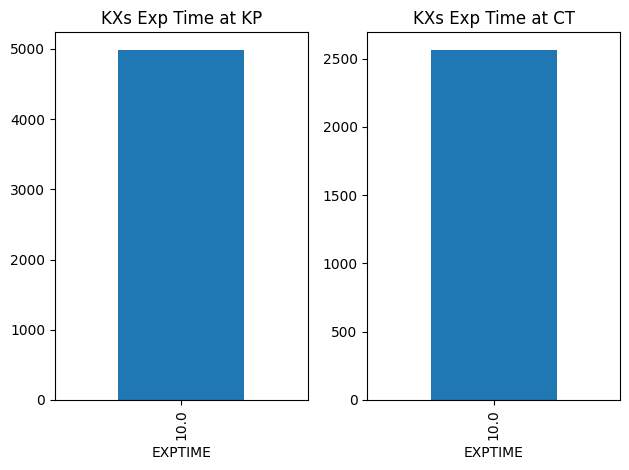

In [7]:
plt.figure()
plt.subplot(1,2,1)
sia_results2[(sia_results2['telescope'] == 'kp4m')]['EXPTIME'].value_counts().loc[:10].plot(kind='bar')
plt.title('KXs Exp Time at KP')

plt.subplot(1,2,2)
sia_results2[(sia_results2['telescope'] == 'ct4m')]['EXPTIME'].value_counts().loc[:10].plot(kind='bar')
plt.title('KXs Exp Time at CT')

plt.gcf().tight_layout()

In [8]:
sia_results3 = sia_results2[~sia_results2.OBJECT.str.contains('Mask', regex=True,na=False)]
sia_results3 = sia_results3[~sia_results3.OBJECT.str.contains('defocus', regex=True,na=False)]


sia_results3['datetime_rel'] = pd.to_datetime(sia_results3.release_date)
sia_results3 = sia_results3[sia_results3.datetime_rel < datetime.now()]

sia_results3 = sia_results3.head(10)
sia_results3 = sia_results3.reset_index()

sia_results3 = sia_results3.assign(ra_center=str(0),
                                   dec_center=str(0),
                                   coord_sys=str(0),
                                   obs_lat=str(0),
                                   obs_long=str(0),
                                   tel_az=str(0),
                                   astro_cal_cat=str(0))

for index, row in sia_results3.iterrows():
    hdu = fits.open(row['url'])
    hdr = hdu[0].header
    print(hdr['RAWFILE'])

    sia_results3['ra_center'].at[index] = hdr['CENTRA']
    sia_results3['dec_center'].at[index] = hdr['CENTDEC']
    sia_results3['coord_sys'].at[index] = hdr['RADECSYS']
    sia_results3['obs_lat'].at[index] = hdr['OBS-LAT']
    sia_results3['obs_long'].at[index] = hdr['OBS-LONG']
    sia_results3['tel_az'].at[index] = hdr['AZ']
    sia_results3['astro_cal_cat'].at[index] = hdr['ASTRMCAT']



n4_249523.fits
n4305565.fits
n6307818.fits
n5_231441.fits
n5_231442.fits
n5_231443.fits
n5_231444.fits
20140319_279942.fits
n2_247765.fits
n2_247766.fits


In [9]:
from astroquery.simbad import Simbad


c = SkyCoord(sia_results3['ra_center'].iloc[1]*u.deg,sia_results3['dec_center'].iloc[1]*u.deg,frame=sia_results3['coord_sys'].iloc[1].lower())
r = 28 * u.arcminute # 28 arcminutes is the FOV of the NEWFIRM imager (both horizontal and vertical)

adql = rf"""SELECT main_id, ra, dec, otype, flux, filter, bibcode AS flux_reference 
FROM flux JOIN basic ON oidref = oid
WHERE main_id LIKE '2MASS%'
AND CONTAINS(POINT('ICRS', basic.ra, basic.dec), CIRCLE('ICRS', {c.ra.deg}, {c.dec.deg} , {r.to(u.degree).to_value()})) = 1
"""

tap_results = Simbad.query_tap(adql)

In [10]:
from astropy.wcs import WCS

hdu = fits.open(sia_results3.iloc[1]['url'])
hdr = hdu[0].header

raw_file_name = hdr['SB_RTNAM']


Next up is extracting the name of the raw image used to create the instcal. Once the raw file is recovered, I can run my pipeline on it to see how it compares with the instcal.

In [11]:
hdu = fits.open(sia_results3['url'][1])
hdr = hdu[0].header
this_seqid = hdr['SEQID']
this_instr = hdr['INSTRUME']
this_propid = hdr['PROPID']
this_caldat = hdr['DTCALDAT']
this_filter = hdr['FILTER']
this_rawfile = hdr['RAWFILE']
this_filename = hdr.cards['FILENAME'][1]

jj = {
    "outfields" : [
        "telescope",
        "md5sum",
        "ra_min",  # "ra" is a "range_field" in Postgres, access either part of range
        "archive_filename",
        "original_filename",
        "instrument",
        "proc_type",
        "ifilter",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "DATE-OBS",
        "EXPTIME",
        "AIRMASS",
        "OBJECT",
        "SEQID",
        "url"
    ],
    "search" : [
        ["instrument", this_instr],
        ["proc_type","raw"],
        #["proposal",this_propid],
        ["original_filename",this_rawfile,'contains']
    ]
        
}

result_limit = 10

sia_raw_df = pd.DataFrame(requests.post(f'{adsurl}/find/?limit={result_limit}',json=jj).json()[1:])




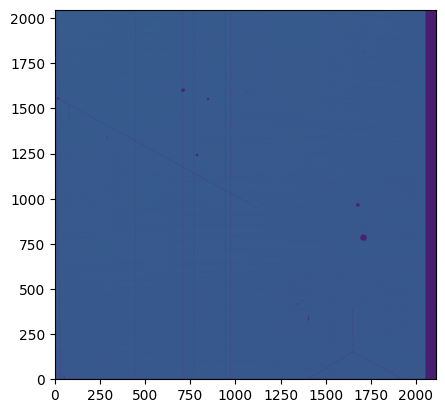

In [12]:
hdul = fits.open(sia_raw_df['url'][0])
element = 2
hdr = hdul[element].header
w = WCS(hdr)

fits_image = hdul[element].data
plt.imshow(fits_image)
plt.gca().invert_yaxis()

With the raw data and its coordinate system ready, now it's time to bring in the expected cal star locations

In [13]:
from dl import queryClient as qc

hdr = hdul[element].header
ra = hdr['RA'] # in degrees
dec = hdr['DEC'] # in degrees

frm = hdul[0].header['RADECSYS'].lower()

c = SkyCoord(ra,dec,frame=frm,unit=(u.hourangle,u.deg))

fov = 28 * u.arcminute * 2

sql = '''SELECT ra, dec, gmag 
            FROM nsc_dr2.object 
            WHERE Q3C_RADIAL_QUERY(ra,dec,{0},{1},{2})
            AND gerr < 0.1 AND gmag < 22
'''.format(c.ra.value, c.dec.value, (fov.to(u.deg)).value)
stars_df = qc.query(sql=sql, fmt='pandas')

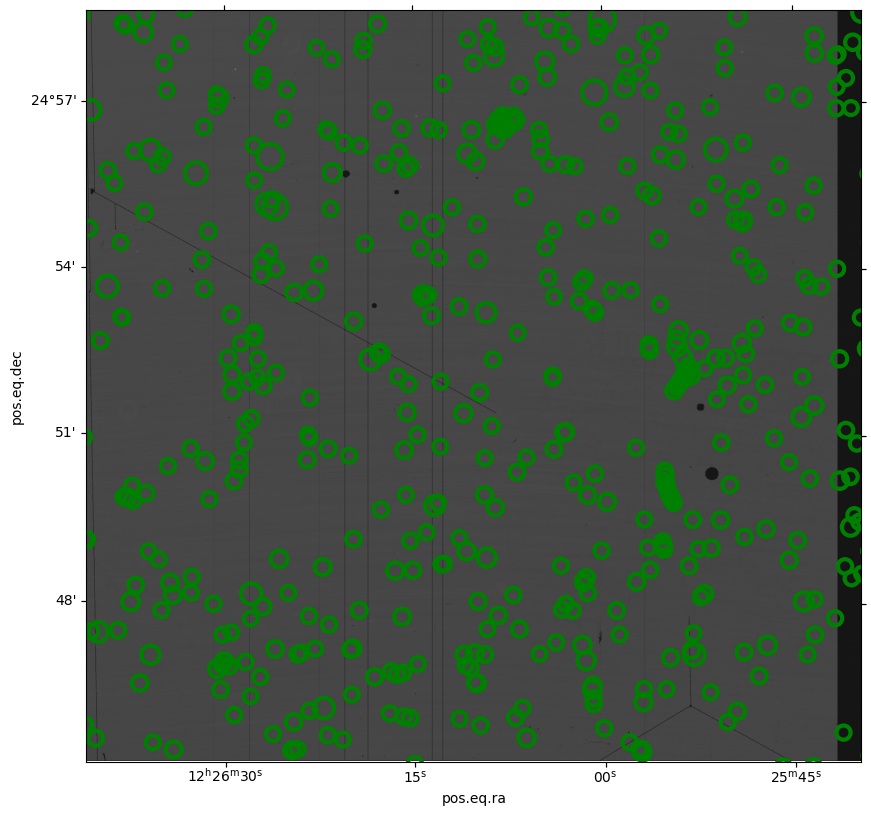

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=w)
ax1 = ax.imshow(fits_image, cmap='gray')#, vmin=fits_image.min(), vmax=fits_image.min()+(fits_image.max()-fits_image.min())/100.)
ax2 = ax.scatter(stars_df['ra'], stars_df['dec'], transform=ax.get_transform('icrs'), s=1000./(stars_df['gmag']-12), edgecolor='green', facecolor='none', linewidths=3)
plt.xlim(ax1.get_extent()[0], ax1.get_extent()[1])
plt.ylim(ax1.get_extent()[2], ax1.get_extent()[3])
plt.show()

In [15]:
prior_day = str((pd.to_datetime(this_caldat)-pd.to_timedelta(1,'days')).date())


jj = {
    "outfields" : [
        "telescope",
        "md5sum",
        "ra_min",  # "ra" is a "range_field" in Postgres, access either part of range
        "archive_filename",
        "original_filename",
        "instrument",
        "proc_type",
        "prod_type",
        "ifilter",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "DATE-OBS",
        "EXPTIME",
        "AIRMASS",
        "OBJECT",
        "SEQID",
        "url"
    ],
    "search" : [
        ["instrument", this_instr],
        ["proc_type","raw"],
        ["PROPID",this_propid],
        ["prod_type","image"],
        ["obs_type","dark","flat","dome flat"],
        ["caldat",prior_day,this_caldat]
    ]
        
}

result_limit = 1000

sia_cal_df = pd.DataFrame(requests.post(f'{adsurl}/find/?limit={result_limit}',json=jj).json()[1:])


In [16]:
sia_cal_df['start_time'] = pd.to_datetime(sia_cal_df['DATE-OBS'])
sia_cal_df['dTime'] = pd.to_numeric(sia_cal_df['start_time'] - pd.to_datetime(hdr['DATE-OBS']))



In [17]:
jj = {
    "outfields" : [
        "telescope",
        "md5sum",
        "ra_min",  # "ra" is a "range_field" in Postgres, access either part of range
        "archive_filename",
        "original_filename",
        "instrument",
        "proc_type",
        "prod_type",
        "ifilter",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "DATE-OBS",
        "EXPTIME",
        "AIRMASS",
        "OBJECT",
        "SEQID",
        "url"
    ],
    "search" : [
        ["instrument", this_instr],
        ["proc_type","instcal"],
        ["PROPID",this_propid],
        ["SEQID",this_seqid],
        ["prod_type","dqmask"],
        ["obs_type","object"],
        ["caldat",prior_day,this_caldat]
    ]
        
}

result_limit = 1000

sia_mask_df = pd.DataFrame(requests.post(f'{adsurl}/find/?limit={result_limit}',json=jj).json()[1:])

mask_url = sia_mask_df[sia_mask_df.OBJECT.str.contains(this_filename, regex=True,na=False)]['url']



In [15]:
from astroquery.vizier import Vizier
vizier = Vizier(columns=["*"], catalog="II/246")
result = vizier.query_region("HD 226868", height="28m",width="28m")
result_pd = result['II/246/out'].to_pandas()
print(result_pd)